**agenda**

In [ ]:
## simple moving avrage
## cumulative moving avrage
## expotential moving weighted avrage
##  moving avrage (ACF) 
## autoregrsor model(PACF)

In [ ]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas_datareader.data as web
import pandas as pd
from datetime import datetime

In [ ]:
tsla=web.get_data_yahoo('TSLA')

In [ ]:
tsla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-24,21.094000,20.733334,20.919333,21.036667,48661500.0,21.036667
2017-11-27,21.156000,20.634001,20.883333,21.120667,68338500.0,21.120667
2017-11-28,21.333332,20.927999,21.090668,21.170000,74242500.0,21.170000
2017-11-29,21.200001,20.082001,21.153334,20.502666,131511000.0,20.502666
2017-11-30,20.713333,20.302668,20.570667,20.590000,65274000.0,20.590000
...,...,...,...,...,...,...
2022-11-16,192.570007,185.660004,191.509995,186.919998,66567600.0,186.919998
2022-11-17,186.160004,180.899994,183.960007,183.169998,64336000.0,183.169998
2022-11-18,185.190002,176.550003,185.050003,180.190002,75904900.0,180.190002


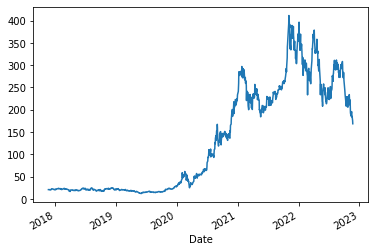

In [ ]:
tsla['Open'].plot()

In [ ]:
## simple moving avrage

take a rolling method ,seclect the window size for eg.5 caluclate the avrage of first 5 element beacuse window size is 5, this value is assingn to 6th place .do until data set get over  this caller as simple moving avrage

used for smothning of graph

In [ ]:
tsla['10_days_of_rolling_open']=tsla['Open'].rolling(window=10,min_periods=1).mean()

In [ ]:
tsla

,High,Low,Open,Close,Volume,Adj Close,10_days_of_rolling_open
Date,,,,,,,
2017-11-24,21.094000,20.733334,20.919333,21.036667,48661500.0,21.036667,20.919333
2017-11-27,21.156000,20.634001,20.883333,21.120667,68338500.0,21.120667,20.901333
2017-11-28,21.333332,20.927999,21.090668,21.170000,74242500.0,21.170000,20.964444
2017-11-29,21.200001,20.082001,21.153334,20.502666,131511000.0,20.502666,21.011667
2017-11-30,20.713333,20.302668,20.570667,20.590000,65274000.0,20.590000,20.923467
...,...,...,...,...,...,...,...
2022-11-16,192.570007,185.660004,191.509995,186.919998,66567600.0,186.919998,198.347000
2022-11-17,186.160004,180.899994,183.960007,183.169998,64336000.0,183.169998,195.607001
2022-11-18,185.190002,176.550003,185.050003,180.190002,75904900.0,180.190002,191.852000


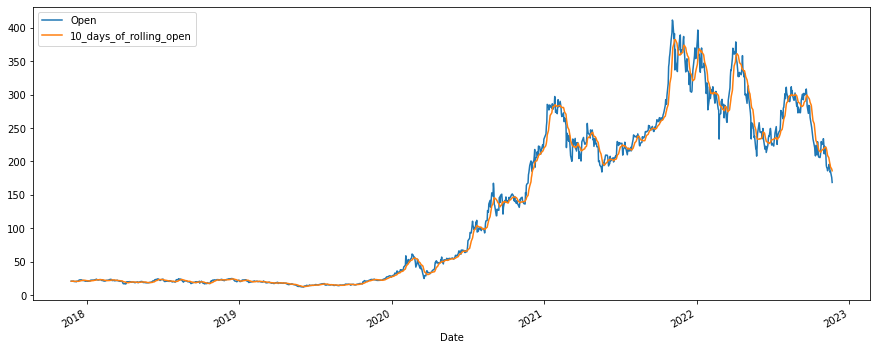

In [ ]:
tsla[['Open','10_days_of_rolling_open']].plot(figsize=(15,6))

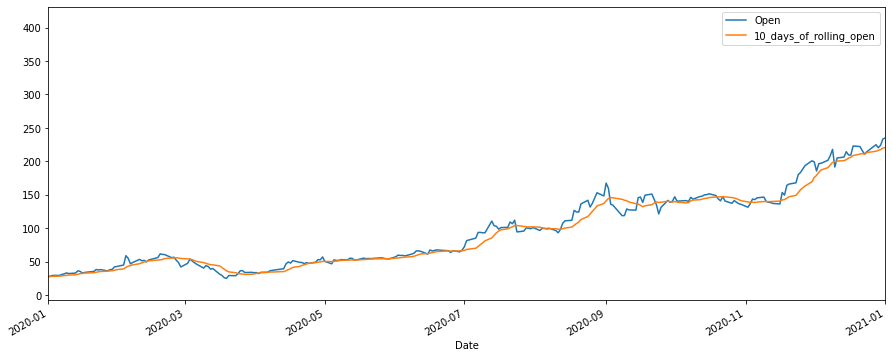

In [ ]:
 tsla[['Open','10_days_of_rolling_open']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [ ]:
## making orlling for 30 and 50 70 day

In [ ]:
tsla['30_days_of_rolling_open']=tsla['Open'].rolling(window=30,min_periods=1).mean()
tsla['50_days_of_rolling_open']=tsla['Open'].rolling(window=50,min_periods=1).mean()

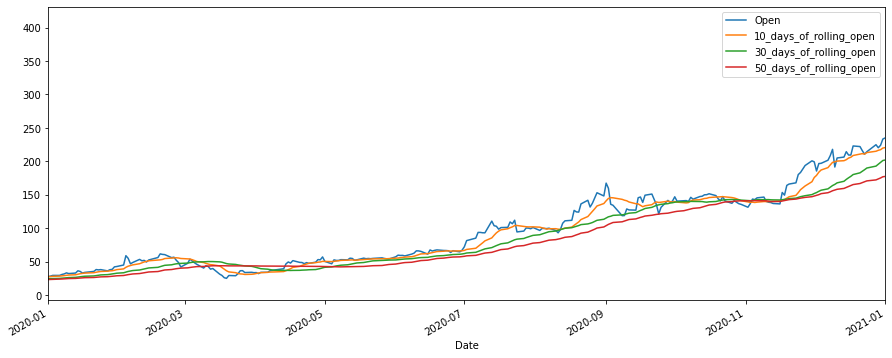

In [ ]:
tsla[['Open','10_days_of_rolling_open','30_days_of_rolling_open','50_days_of_rolling_open']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [ ]:
### disadvantage of simple moving avrage
#1 giving simlilar importance to all data our aim is to most importance to resent data in time series data


**cumulative moving avrage(CMA)**

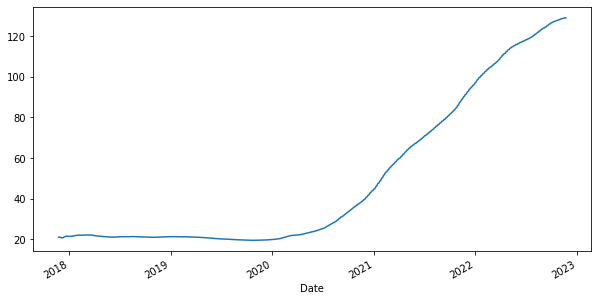

In [ ]:
## expanding
tsla['Open'].expanding().mean().plot(figsize=(10,5))

**Expotential moving avrage(EMA)**

In [ ]:
tsla['ema_01']=tsla['Open'].ewm(alpha=0.1,adjust=False).mean()
tsla['ema_03']=tsla['Open'].ewm(alpha=0.3,adjust=False).mean()

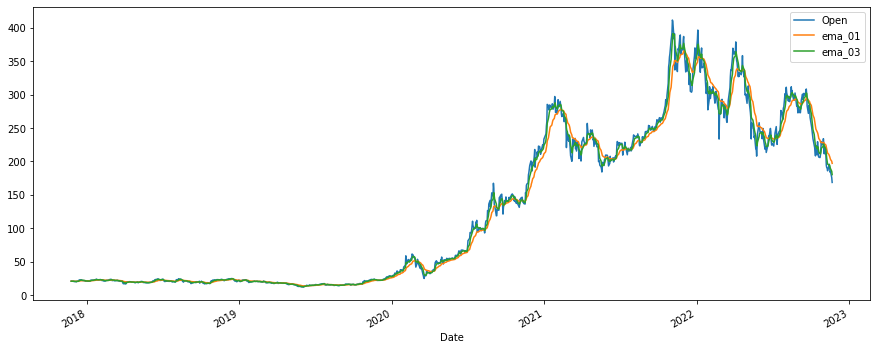

In [ ]:
tsla[['Open','ema_01','ema_03']].plot(figsize=(15,6))

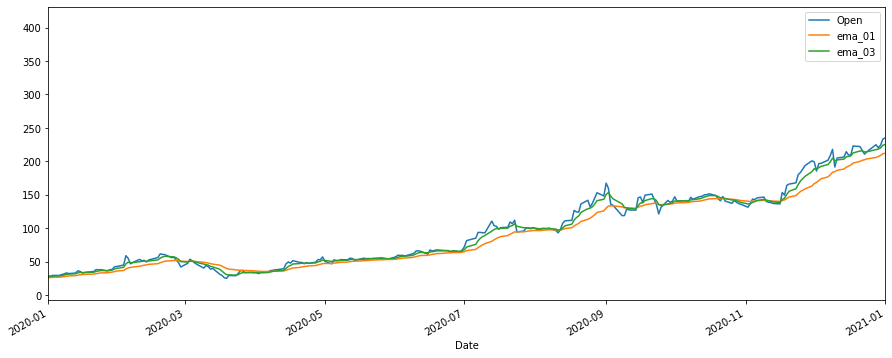

In [ ]:
tsla[['Open','ema_01','ema_03']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

**Expotential weighted moving avrage**

In [ ]:
tsla['ewma']=tsla['Open'].ewm(span=4).mean()

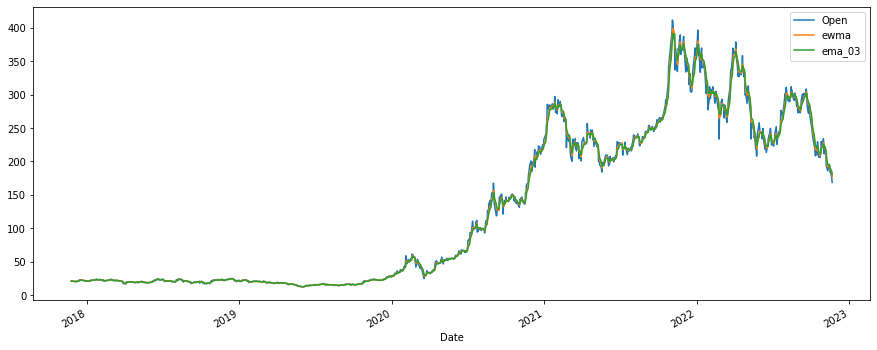

In [ ]:
tsla[['Open','ewma','ema_03']].plot(figsize=(15,6))

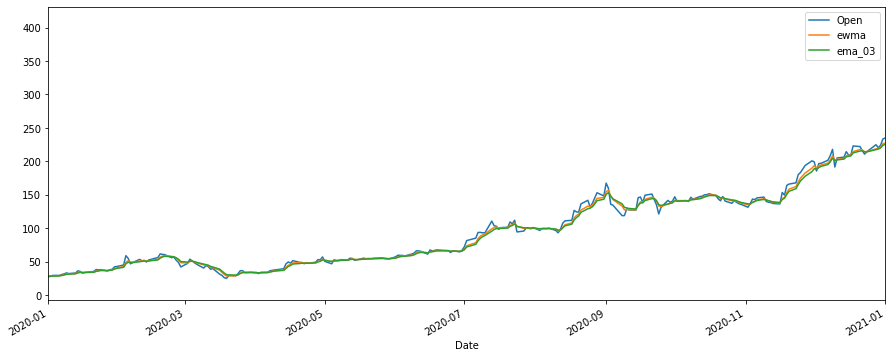

In [ ]:
tsla[['Open','ewma','ema_03']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

MOVING AVRAGE